In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

# from leitmotifs.lama import *

import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

In [2]:
df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
df1.head()

,Dataset,Method,Precision,Recall
0,Boxing,LAMA,0.9,0.9
1,Boxing,LAMA (naive),0.8,0.8
2,Boxing,mSTAMP+MDL,1.0,0.2
3,Boxing,mSTAMP,1.0,0.2
4,Boxing,EMD*,0.8,0.8


In [3]:
def read_data():
    df1 = pd.read_csv("../tests/results/motion_precision.csv", index_col=0)
    df2 = pd.read_csv("../tests/results/birdsounds_precision.csv", index_col=0)
    df3 = pd.read_csv("../tests/results/soundtracks_precision.csv", index_col=0)
    df4 = pd.read_csv("../tests/results/audio_precision.csv", index_col=0)
    df5 = pd.read_csv("../tests/results/physio_precision.csv", index_col=0)    
    df6 = pd.read_csv("../tests/results/stocks_precision.csv", index_col=0)        
    df_smm = pd.read_csv("../tests/csv/smm_results.csv")
    df_smm["Method"]="SMM"

    df = pd.concat([df1, df2, df3, df4, df5, df6, df_smm])

    df.reset_index(inplace=True, drop=True)
    df.drop(df[df.Method == "LAMA (naive)"].index, inplace=True)
    df.Precision = df.Precision * 100
    df.Recall = df.Recall * 100
    
    return df

df = read_data()
df

,Dataset,Method,Precision,Recall
0,Boxing,LAMA,90.000000,90.0
2,Boxing,mSTAMP+MDL,100.000000,20.0
3,Boxing,mSTAMP,100.000000,20.0
4,Boxing,EMD*,80.000000,80.0
5,Boxing,K-Motifs (TOP-f),70.000000,70.0
...,...,...,...,...
138,Vanilla Ice - Ice Ice Baby,SMM,49.122807,100.0
139,Queen David Bowie - Under Pressure,SMM,24.761905,100.0
140,"The Rolling Stones - Paint It, Black",SMM,21.359223,100.0
141,Star Wars - The Imperial March,SMM,27.272727,100.0


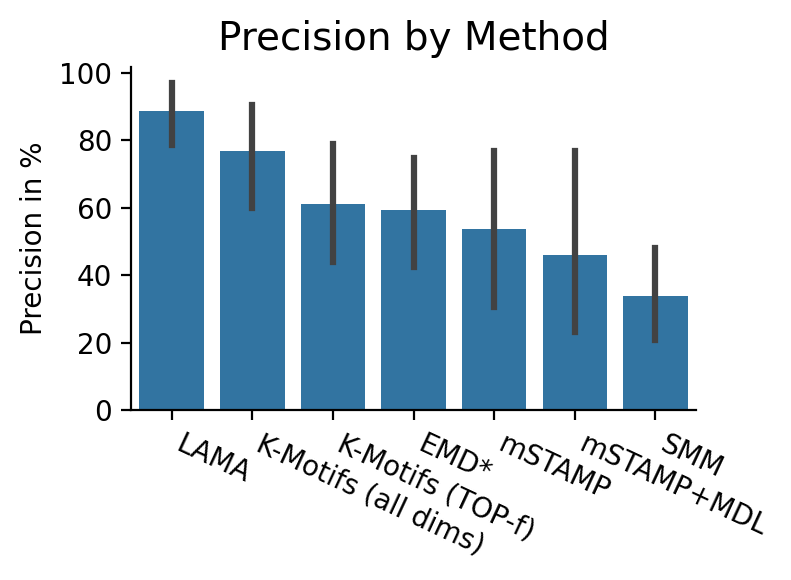

In [4]:
df = read_data()
df.Method[df.Method == "K-Motifs (TOP-N)"] = "K-Motifs (TOP-f dims)"
df.Method[df.Method == "K-Motifs (all)"] = "K-Motifs (all dims)"

# filter
with_distances = ["LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[~df.Method.isin(with_distances)]

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-25, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Precision in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision.pdf")

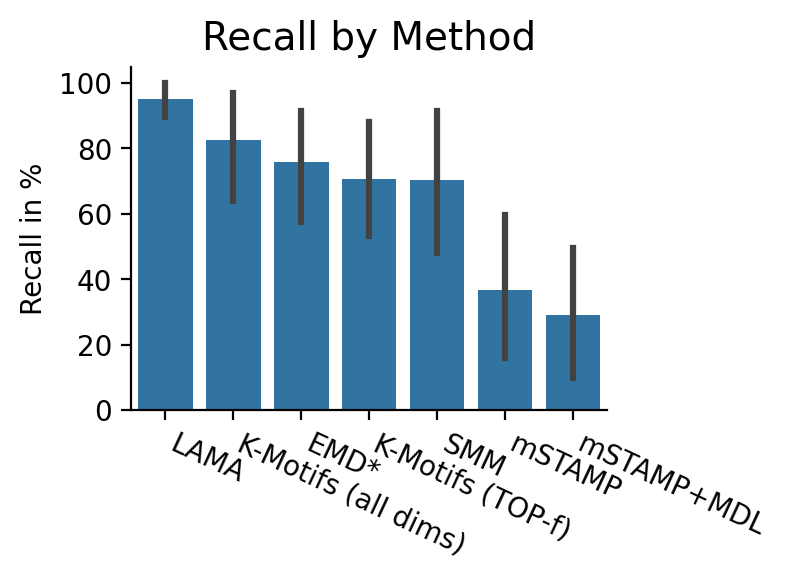

In [5]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-25, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Recall in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall.pdf")

In [6]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]))

                     Precision                 Recall       
                          mean      median       mean median
Method                                                      
EMD*                 59.326923   65.000000  75.897436   80.0
K-Motifs (TOP-f)     61.098901   70.000000  70.769231  100.0
K-Motifs (all dims)  76.762821   83.333333  82.564103  100.0
LAMA                 88.685897  100.000000  95.128205  100.0
SMM                  33.776224   27.272727  70.384615  100.0
mSTAMP               53.846154  100.000000  36.666667   20.0
mSTAMP+MDL           46.153846    0.000000  28.974359    0.0


In [7]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{Precision} & \multicolumn{2}{l}{Recall} \\
{} &       mean &      median &       mean & median \\
Method              &            &             &            &        \\
\midrule
EMD*                &  59.326923 &   65.000000 &  75.897436 &   80.0 \\
K-Motifs (TOP-f)    &  61.098901 &   70.000000 &  70.769231 &  100.0 \\
K-Motifs (all dims) &  76.762821 &   83.333333 &  82.564103 &  100.0 \\
LAMA                &  88.685897 &  100.000000 &  95.128205 &  100.0 \\
SMM                 &  33.776224 &   27.272727 &  70.384615 &  100.0 \\
mSTAMP              &  53.846154 &  100.000000 &  36.666667 &   20.0 \\
mSTAMP+MDL          &  46.153846 &    0.000000 &  28.974359 &    0.0 \\
\bottomrule
\end{tabular}



In [8]:
print(df.groupby(df.Method)[["Precision", "Recall"]].agg(["mean", "median"]).to_markdown())

| Method              |   ('Precision', 'mean') |   ('Precision', 'median') |   ('Recall', 'mean') |   ('Recall', 'median') |
|:--------------------|------------------------:|--------------------------:|---------------------:|-----------------------:|
| EMD*                |                 59.3269 |                   65      |              75.8974 |                     80 |
| K-Motifs (TOP-f)    |                 61.0989 |                   70      |              70.7692 |                    100 |
| K-Motifs (all dims) |                 76.7628 |                   83.3333 |              82.5641 |                    100 |
| LAMA                |                 88.6859 |                  100      |              95.1282 |                    100 |
| SMM                 |                 33.7762 |                   27.2727 |              70.3846 |                    100 |
| mSTAMP              |                 53.8462 |                  100      |              36.6667 |                  

# Compare different Distance Measures

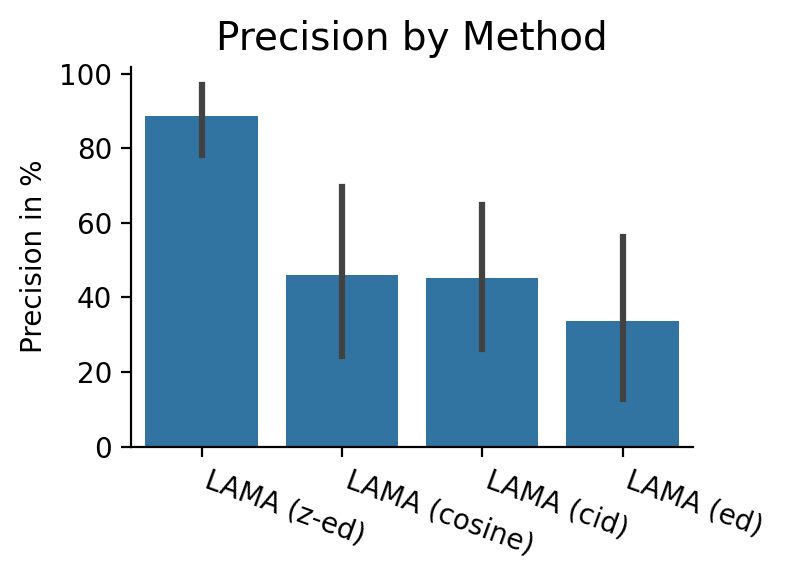

In [9]:
df = read_data()
df.Method[df.Method == "LAMA"] = "LAMA (z-ed)"

# filter
with_distances = ["LAMA (z-ed)", "LAMA (cid)", "LAMA (ed)", "LAMA (cosine)"]
df = df[df.Method.isin(with_distances)]

fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Precision, ax=ax, 
            order=df[["Method", "Precision"]].groupby("Method").mean().sort_values(by="Precision", ascending=False).reset_index()["Method"])
ax.set_title("Precision by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Precision in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_precision_distances.pdf")

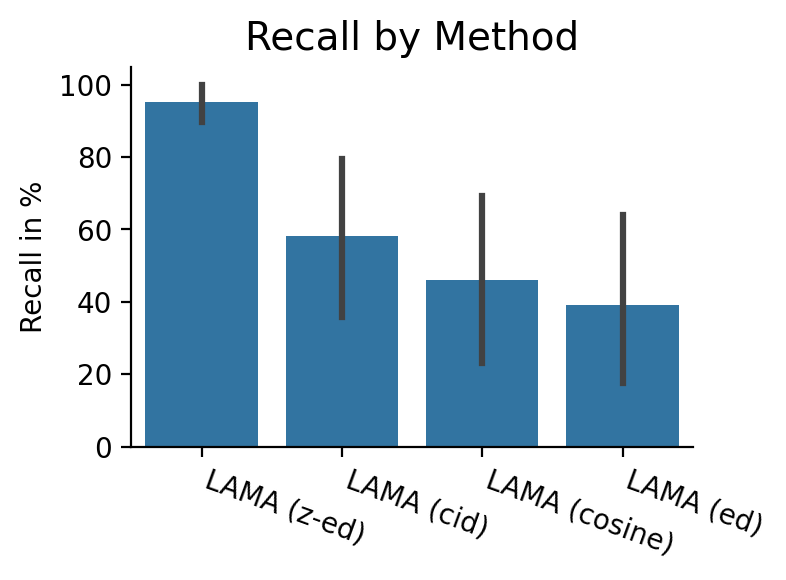

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df.Method, y=df.Recall, ax=ax, 
            order=df[["Method", "Recall"]].groupby("Method").mean().sort_values(by="Recall", ascending=False).reset_index()["Method"])
ax.set_title("Recall by Method", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=-20, fontsize=10, ha='left')
plt.xlabel("")
plt.ylabel("Recall in %")
sns.despine()
plt.tight_layout()
plt.savefig("../tests/results/images/barplot_recall_distances.pdf")

In [11]:
#datasets = ["common-starling-sturnus-vulgaris.csv",
#"Lord-of-the-Rings-Symphony-The-Shire.csv",
#"Star_Wars_The_Imperial_March_Theme_Song.csv",
#"The-Rolling-Stones-Paint-It-Black.csv",
#"Numb-Linkin-Park.csv",
#"Queen-David-Bowie-Under-Pressure.csv",
#"Vanilla_Ice-Ice_Ice_Baby.csv",
#"What-I-ve-Done-Linkin-Park.csv"]

#for d in datasets:
#    df2 = pd.read_csv("../datasets/audio/"+d, index_col=0, compression='gzip')
#    print(d, df2.shape)

In [12]:
# df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]

In [13]:
# df[("LAMA" == df.Method) | ("LAMA (naive)" == df.Method)]